### Using Pandas, analyze a stock price dataset. Perform resampling, rolling mean, and differencing. Train a regression or clustering model on time-based features.

In [1]:
pip install yfinance

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.4 MB/s  0:00:00 eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached beautifulsoup4-4.14.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached websockets-15.0.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached cffi-2.0.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.6 kB)
  Using cached pycparser-2.23-py3-none-any.whl.metadata (993 bytes)
  Using cached charset_normalizer-3.4.4-cp313-cp313-macosx_10_13_universal2.whl.metadata (37 kB)
  Using cached idna-3.11-py3-none-any.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Download Apple stock data (you can change 'AAPL' to any ticker symbol)
data = yf.download('AAPL', start='2020-01-01', end='2025-01-01')
data.head()


/var/folders/3d/qzf74m41729c4zdhmb5cvgc00000gn/T/ipykernel_28951/66147390.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468269,72.528589,71.223267,71.476607,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335548,72.374154,70.634532,70.885464,118387200
2020-01-07,71.995377,72.600983,71.775811,72.345227,108872000
2020-01-08,73.153488,73.455087,71.698574,71.698574,132079200


In [4]:
# Display dataset info and summary
print("Dataset Info:")
print("="*40)
data.info()

print("\nStatistical Summary:")
display(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1258 non-null   float64
 1   (High, AAPL)    1258 non-null   float64
 2   (Low, AAPL)     1258 non-null   float64
 3   (Open, AAPL)    1258 non-null   float64
 4   (Volume, AAPL)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB

Statistical Summary:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,151.659031,153.183638,149.958963,151.504428,9.057103e+07
std,41.929755,42.070380,41.706645,41.873457,5.324438e+07
min,54.264328,55.263178,51.420150,55.161600,2.323470e+07
25%,126.513742,127.633782,124.509400,125.957973,5.546825e+07
50%,150.247261,151.991617,148.312209,150.067184,7.628335e+07
75%,176.228844,177.782127,174.661136,176.034673,1.077425e+08
max,257.853760,258.928914,256.470034,257.027510,4.265100e+08


/var/folders/3d/qzf74m41729c4zdhmb5cvgc00000gn/T/ipykernel_28951/732323414.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close'].resample('M').mean()


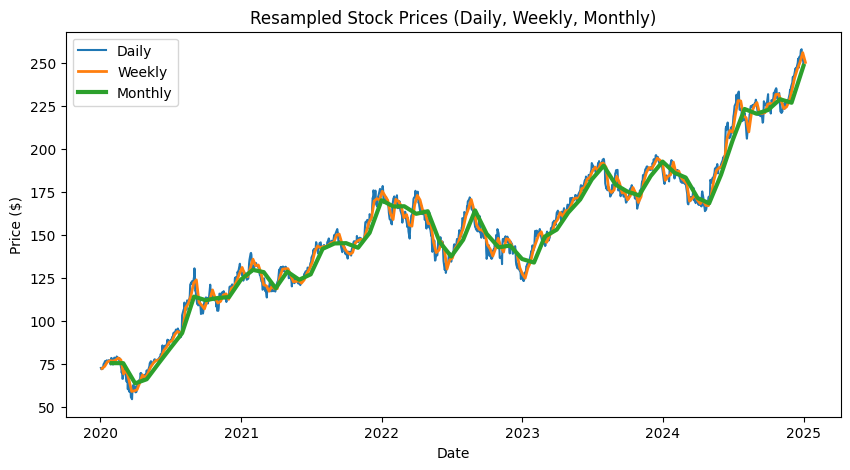

In [5]:
# Weekly average closing price
weekly_data = data['Close'].resample('W').mean()

# Monthly average closing price
monthly_data = data['Close'].resample('M').mean()

plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Daily')
plt.plot(weekly_data, label='Weekly', linewidth=2)
plt.plot(monthly_data, label='Monthly', linewidth=3)
plt.legend()
plt.title("Resampled Stock Prices (Daily, Weekly, Monthly)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()


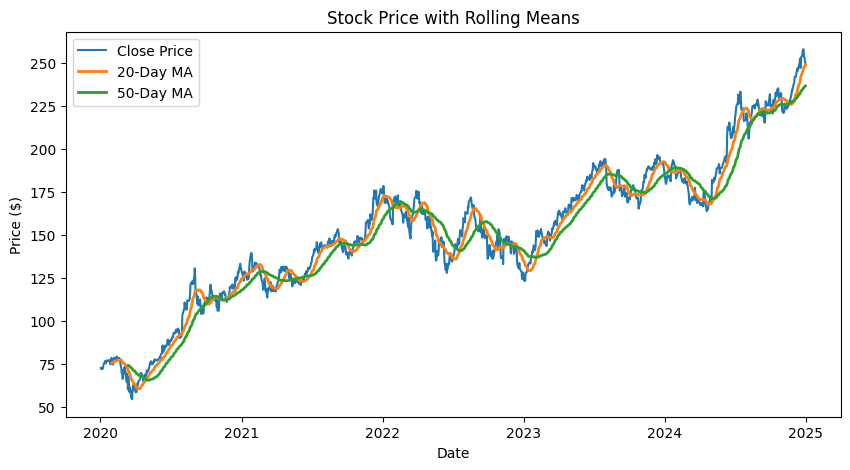

In [6]:
# Calculate rolling mean
data['Rolling_Mean_20'] = data['Close'].rolling(window=20).mean()
data['Rolling_Mean_50'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Rolling_Mean_20'], label='20-Day MA', linewidth=2)
plt.plot(data['Rolling_Mean_50'], label='50-Day MA', linewidth=2)
plt.legend()
plt.title("Stock Price with Rolling Means")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()


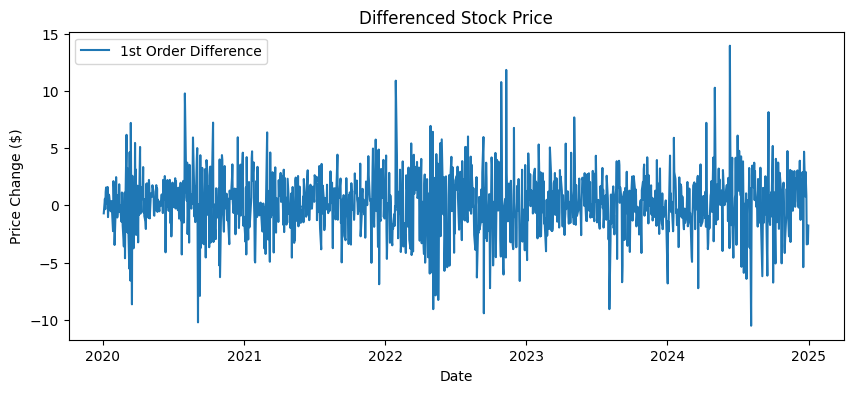

In [7]:
# First-order differencing
data['Price_Diff'] = data['Close'].diff()

plt.figure(figsize=(10,4))
plt.plot(data['Price_Diff'], label='1st Order Difference')
plt.title("Differenced Stock Price")
plt.xlabel("Date")
plt.ylabel("Price Change ($)")
plt.legend()
plt.show()


In [8]:
# Reset index to access Date column
df = data.reset_index()

# Create time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)

df[['Date', 'Close', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsMonthStart']].head()


Price,Date,Close,Year,Month,Day,DayOfWeek,IsMonthStart
Ticker,,AAPL,,,,,
0,2020-01-02,72.468269,2020,1,2,3,0
1,2020-01-03,71.763725,2020,1,3,4,0
2,2020-01-06,72.335548,2020,1,6,0,0
3,2020-01-07,71.995377,2020,1,7,1,0
4,2020-01-08,73.153488,2020,1,8,2,0


In [9]:
# Select features and target
features = ['Year', 'Month', 'Day', 'DayOfWeek', 'IsMonthStart']
X = df[features]
y = df['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", round(r2_score(y_test, y_pred), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))


R² Score: 0.4747
RMSE: 18.52


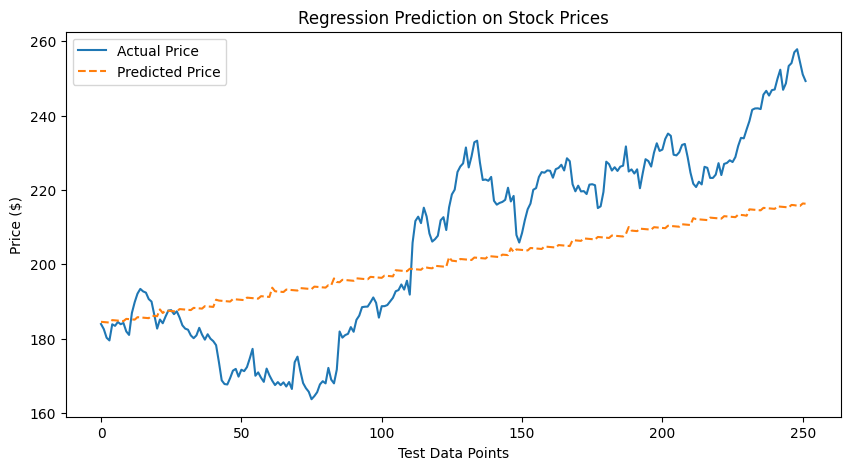

In [10]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price', linestyle='--')
plt.legend()
plt.title("Regression Prediction on Stock Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Price ($)")
plt.show()


Rows used for clustering after coercion: 1258
Price  Month DayOfWeek      Close
Ticker                           
0          1         3  72.468269
1          1         4  71.763725
2          1         0  72.335548
3          1         1  71.995377
4          1         2  73.153488
Rows available for plotting: 1258


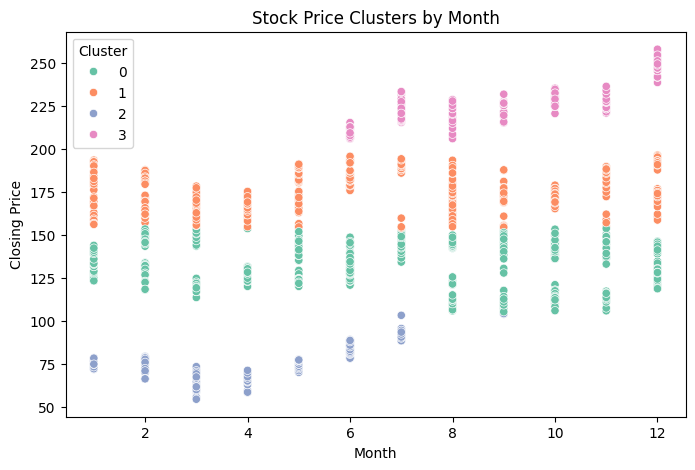

In [11]:
# Robust KMeans clustering (finalized: construct flat plotting DataFrame)
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Helper: extract a flat Close Series from df even if columns are MultiIndex
def extract_close_series(df):
    for col in df.columns:
        if (isinstance(col, str) and col == 'Close') or (isinstance(col, tuple) and col[0] == 'Close'):
            series = df[col]
            # if series is DataFrame (multiple subcolumns), pick the first sub-column
            if isinstance(series, pd.DataFrame):
                return series.iloc[:, 0]
            return series
    # Fallback: any column name containing 'Close'
    for col in df.columns:
        if 'Close' in str(col):
            series = df[col]
            if isinstance(series, pd.DataFrame):
                return series.iloc[:, 0]
            return series
    raise KeyError('Close column not found')

# Prepare and sanitize features for clustering
clustering_features = df[['Month', 'DayOfWeek']].copy()
clustering_features['Close'] = extract_close_series(df)

# Function to coerce possibly-array-like cell to scalar when possible
def cell_to_scalar(v):
    if isinstance(v, pd.Series):
        try:
            if v.size == 1:
                return v.iloc[0]
            return v.values
        except Exception:
            return v
    if isinstance(v, (np.ndarray, list, tuple)):
        arr = np.asarray(v)
        if arr.size == 1:
            return arr.ravel()[0]
        return arr
    return v

# Apply scalar coercion to each column's entries
for col in clustering_features.columns:
    clustering_features[col] = clustering_features[col].apply(cell_to_scalar)

# Now coerce columns to numeric using per-element conversion (handles remaining arrays)
def to_numeric_series(s):
    def convert(v):
        if isinstance(v, (list, tuple, np.ndarray)):
            arr = np.asarray(v)
            if arr.size == 1:
                return arr.ravel()[0]
            return np.nan
        return v
    return pd.to_numeric(s.map(convert), errors='coerce')

clustering_features['Month'] = to_numeric_series(clustering_features['Month'])
clustering_features['DayOfWeek'] = to_numeric_series(clustering_features['DayOfWeek'])
clustering_features['Close'] = to_numeric_series(clustering_features['Close'])
clustering_features = clustering_features.dropna()

print(f"Rows used for clustering after coercion: {len(clustering_features)}")
print(clustering_features.head())

if len(clustering_features) == 0:
    raise RuntimeError('No valid rows available for clustering after coercion.')

# Run KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(clustering_features[['Month', 'DayOfWeek', 'Close']].values)

# Assign labels back to original df aligning by index
df.loc[clustering_features.index, 'Cluster'] = labels

# Construct a flat plotting DataFrame to avoid MultiIndex issues
plot_df = pd.DataFrame({
    'Month': df['Month'],
    'Close': extract_close_series(df),
    'Cluster': df['Cluster']
}).loc[df['Cluster'].notna()].copy()

# Coerce types for plotting
plot_df['Month'] = pd.to_numeric(plot_df['Month'], errors='coerce')
plot_df['Close'] = to_numeric_series(plot_df['Close'])
plot_df['Cluster'] = pd.to_numeric(plot_df['Cluster'], errors='coerce').astype('Int64')
plot_df = plot_df.dropna()

print(f"Rows available for plotting: {len(plot_df)}")

# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='Month', y='Close', hue='Cluster', data=plot_df, palette='Set2')
plt.title("Stock Price Clusters by Month")
plt.xlabel("Month")
plt.ylabel("Closing Price")
plt.show()
